In [1]:
import pandas as pd
import numpy as np
import os
# plot
import matplotlib.pyplot as plt
import seaborn as sns
#preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#modelování
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pickle
#vyhodnocení
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score

### Spojení dat

In [46]:
sloupce = ['ticker',
 'Revenue',
 'Revenue Growth',
 'Cost of Revenue',
 'Gross Profit',
 'R&D Expenses',
 'SG&A Expense',
 'Operating Expenses',
 'Operating Income',
 'Interest Expense',
 'Earnings before Tax',
 'Income Tax Expense',
 'Net Income - Non-Controlling int',
 'Net Income - Discontinued ops',
 'Net Income',
 'Preferred Dividends',
 'Net Income Com',
 'EPS',
 'EPS Diluted',
 'Weighted Average Shs Out',
 'Weighted Average Shs Out (Dil)',
 'Dividend per Share',
 'Gross Margin',
 'EBITDA Margin',
 'EBIT Margin',
 'Profit Margin',
 'Free Cash Flow margin',
 'EBITDA',
 'EBIT',
 'Consolidated Income',
 'Earnings Before Tax Margin',
 'Net Profit Margin',
 'Cash and cash equivalents',
 'Short-term investments',
 'Cash and short-term investments',
 'Receivables',
 'Inventories',
 'Total current assets',
 'Property, Plant & Equipment Net',
 'Goodwill and Intangible Assets',
 'Long-term investments',
 'Tax assets',
 'Total non-current assets',
 'Total assets',
 'Payables',
 'Short-term debt',
 'Total current liabilities',
 'Long-term debt',
 'Total debt',
 'Deferred revenue',
 'Tax Liabilities',
 'Deposit Liabilities',
 'Total non-current liabilities',
 'Total liabilities',
 'Other comprehensive income',
 'Retained earnings (deficit)',
 'Total shareholders equity',
 'Investments',
 'Net Debt',
 'Other Assets',
 'Other Liabilities',
 'Depreciation & Amortization',
 'Stock-based compensation',
 'Operating Cash Flow',
 'Capital Expenditure',
 'Acquisitions and disposals',
 'Investment purchases and sales',
 'Investing Cash flow',
 'Issuance (repayment) of debt',
 'Issuance (buybacks) of shares',
 'Dividend payments',
 'Financing Cash Flow',
 'Effect of forex changes on cash',
 'Net cash flow / Change in cash',
 'Free Cash Flow',
 'Net Cash/Marketcap',
 'priceBookValueRatio',
 'priceToBookRatio',
 'priceToSalesRatio',
 'priceEarningsRatio',
 'priceToFreeCashFlowsRatio',
 'priceToOperatingCashFlowsRatio',
 'priceCashFlowRatio',
 'priceEarningsToGrowthRatio',
 'priceSalesRatio',
 'dividendYield',
 'enterpriseValueMultiple',
 'priceFairValue',
 'ebitperRevenue',
 'ebtperEBIT',
 'niperEBT',
 'grossProfitMargin',
 'operatingProfitMargin',
 'pretaxProfitMargin',
 'netProfitMargin',
 'effectiveTaxRate',
 'returnOnAssets',
 'returnOnEquity',
 'returnOnCapitalEmployed',
 'nIperEBT',
 'eBTperEBIT',
 'eBITperRevenue',
 'payablesTurnover',
 'inventoryTurnover',
 'fixedAssetTurnover',
 'assetTurnover',
 'currentRatio',
 'quickRatio',
 'cashRatio',
 'daysOfSalesOutstanding',
 'daysOfInventoryOutstanding',
 'operatingCycle',
 'daysOfPayablesOutstanding',
 'cashConversionCycle',
 'debtRatio',
 'debtEquityRatio',
 'longtermDebtToCapitalization',
 'totalDebtToCapitalization',
 'interestCoverage',
 'cashFlowToDebtRatio',
 'companyEquityMultiplier',
 'operatingCashFlowPerShare',
 'freeCashFlowPerShare',
 'cashPerShare',
 'payoutRatio',
 'operatingCashFlowSalesRatio',
 'freeCashFlowOperatingCashFlowRatio',
 'cashFlowCoverageRatios',
 'shortTermCoverageRatios',
 'capitalExpenditureCoverageRatios',
 'dividendpaidAndCapexCoverageRatios',
 'dividendPayoutRatio',
 'Revenue per Share',
 'Net Income per Share',
 'Operating Cash Flow per Share',
 'Free Cash Flow per Share',
 'Cash per Share',
 'Book Value per Share',
 'Tangible Book Value per Share',
 'Shareholders Equity per Share',
 'Interest Debt per Share',
 'Market Cap',
 'Enterprise Value',
 'PE ratio',
 'Price to Sales Ratio',
 'POCF ratio',
 'PFCF ratio',
 'PB ratio',
 'PTB ratio',
 'EV to Sales',
 'Enterprise Value over EBITDA',
 'EV to Operating cash flow',
 'EV to Free cash flow',
 'Earnings Yield',
 'Free Cash Flow Yield',
 'Debt to Equity',
 'Debt to Assets',
 'Net Debt to EBITDA',
 'Current ratio',
 'Interest Coverage',
 'Income Quality',
 'Dividend Yield',
 'Payout Ratio',
 'SG&A to Revenue',
 'R&D to Revenue',
 'Intangibles to Total Assets',
 'Capex to Operating Cash Flow',
 'Capex to Revenue',
 'Capex to Depreciation',
 'Stock-based compensation to Revenue',
 'Graham Number',
 'ROIC',
 'Return on Tangible Assets',
 'Graham Net-Net',
 'Working Capital',
 'Tangible Asset Value',
 'Net Current Asset Value',
 'Invested Capital',
 'Average Receivables',
 'Average Payables',
 'Average Inventory',
 'Days Sales Outstanding',
 'Days Payables Outstanding',
 'Days of Inventory on Hand',
 'Receivables Turnover',
 'Payables Turnover',
 'Inventory Turnover',
 'ROE',
 'Capex per Share',
 'Gross Profit Growth',
 'EBIT Growth',
 'Operating Income Growth',
 'Net Income Growth',
 'EPS Growth',
 'EPS Diluted Growth',
 'Weighted Average Shares Growth',
 'Weighted Average Shares Diluted Growth',
 'Dividends per Share Growth',
 'Operating Cash Flow growth',
 'Free Cash Flow growth',
 '10Y Revenue Growth (per Share)',
 '5Y Revenue Growth (per Share)',
 '3Y Revenue Growth (per Share)',
 '10Y Operating CF Growth (per Share)',
 '5Y Operating CF Growth (per Share)',
 '3Y Operating CF Growth (per Share)',
 '10Y Net Income Growth (per Share)',
 '5Y Net Income Growth (per Share)',
 '3Y Net Income Growth (per Share)',
 '10Y Shareholders Equity Growth (per Share)',
 '5Y Shareholders Equity Growth (per Share)',
 '3Y Shareholders Equity Growth (per Share)',
 '10Y Dividend per Share Growth (per Share)',
 '5Y Dividend per Share Growth (per Share)',
 '3Y Dividend per Share Growth (per Share)',
 'Receivables growth',
 'Inventory Growth',
 'Asset Growth',
 'Book Value per Share Growth',
 'Debt Growth',
 'R&D Expense Growth',
 'SG&A Expenses Growth',
 'Sector',
 'EoY PRICE VAR [%]',
 'Class']

In [47]:
# ve které složce jsou data
slozka = "data"
# základní dataframe, ke kterému budu přidávat načtená data
data = pd.DataFrame(columns=sloupce)
# pro každý soubor ze složky
for soubor in os.listdir(slozka):
    # vyčti rok ze jména souboru
    rok = int(soubor.split("_")[0])
    # načti soubor a přejmenuj sloupce
    nacteny_soubor = pd.read_csv(slozka + os.sep + soubor).rename(columns={f'{rok + 1} PRICE VAR [%]': 'EoY PRICE VAR [%]', "Unnamed: 0": "ticker"})
    # připoj načtený soubor do dat
    data = pd.concat([data, nacteny_soubor], ignore_index=True)

data.to_csv('Komplet_Financial_Data.csv', index=False)

### Načtení dat

In [48]:
df = pd.read_csv('Komplet_Financial_Data.csv')

# Overenie načítania dát
print(df.head())  # Zobrazenie prvých 5 riadkov
print(df.info())  # Informácie o dátach a stĺpcoch

  ticker       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0     PG  7.440100e+10         -0.0713     3.903000e+10  3.537100e+10   
1   VIPS  3.734148e+09          1.1737     2.805625e+09  9.285226e+08   
2     KR  9.837500e+10          0.0182     7.813800e+10  2.023700e+10   
3    RAD  2.552641e+10          0.0053     1.820268e+10  7.323734e+09   
4    GIS  1.790960e+10          0.0076     1.153980e+10  6.369800e+09   

   R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0  0.000000e+00  2.146100e+10        2.146100e+10      1.391000e+10   
1  1.083303e+08  3.441414e+08        7.939267e+08      1.345959e+08   
2  0.000000e+00  1.519600e+10        1.751200e+10      2.725000e+09   
3  0.000000e+00  6.561162e+09        6.586482e+09      7.372520e+08   
4  0.000000e+00  3.474300e+09        3.412400e+09      2.957400e+09   

   Interest Expense  ...  Receivables growth  Inventory Growth  Asset Growth  \
0      7.090000e+08  ...             -0.0187          

In [49]:
print(df.describe())

            Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
count  2.090600e+04    19989.000000     2.030600e+04  2.087000e+04   
mean   5.161619e+09        3.622214     3.258565e+09  1.970452e+09   
std    3.197314e+10      312.648170     2.583092e+10  8.735750e+09   
min   -6.276160e+08      -12.769300    -2.986888e+09 -1.280800e+10   
25%    5.880737e+07       -0.014700     3.211750e+06  3.035575e+07   
50%    4.352510e+08        0.057600     1.530115e+08  1.943525e+08   
75%    2.287259e+09        0.182400     1.180224e+09  8.806035e+08   
max    1.886894e+12    42138.663900     1.581527e+12  4.621600e+11   

       R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
count  1.993900e+04  2.040800e+04        2.037500e+04      2.097600e+04   
mean   1.033333e+08  8.699279e+08        1.368670e+09      5.896979e+08   
std    7.676062e+08  3.804283e+09        5.662984e+09      2.976454e+09   
min   -1.098000e+08 -1.401594e+08       -5.495512e+09     -1.933900e+

In [50]:
# chybějící hodnoty
print(df.isnull().sum())
missing_percentage = (df.isnull().sum() / len(df)) * 100
# v procentech
print(missing_percentage)

ticker                     0
Revenue                 1171
Revenue Growth          2088
Cost of Revenue         1771
Gross Profit            1207
                        ... 
R&D Expense Growth      2479
SG&A Expenses Growth    2422
Sector                     0
EoY PRICE VAR [%]          0
Class                      0
Length: 225, dtype: int64
ticker                   0.000000
Revenue                  5.304163
Revenue Growth           9.457807
Cost of Revenue          8.021923
Gross Profit             5.467228
                          ...    
R&D Expense Growth      11.228881
SG&A Expenses Growth    10.970693
Sector                   0.000000
EoY PRICE VAR [%]        0.000000
Class                    0.000000
Length: 225, dtype: float64


In [51]:
# najdi všechny textové sloupce
for sloupec in df.columns:
    if df[sloupec].dtypes == "O":
        print(sloupec)

ticker
Sector


In [52]:
# ticker konkrétní firmy nebereme pro predikce
del df["ticker"]

In [53]:
# kolik unikátních sektorů?
unique_count = df['Sector'].nunique()
print(f'Počet unikátnych hodnôt: {unique_count}')
# Zobraziť unikátne hodnoty
print(df['Sector'].unique())

Počet unikátnych hodnôt: 11
['Consumer Defensive' 'Basic Materials' 'Healthcare' 'Consumer Cyclical'
 'Industrials' 'Real Estate' 'Communication Services' 'Energy'
 'Financial Services' 'Utilities' 'Technology']


In [54]:
# Aplikovať One-Hot Encoding na správny stĺpec
df_encoded = pd.get_dummies(df, columns=['Sector'], dtype=int)

In [78]:
for col in df_encoded.columns:
    df_encoded[col] = df_encoded[col].fillna(df_encoded[col].median())

In [80]:
correlation_matrix = df_encoded.corr()
# Zobrazenie korelačnej matice
print(correlation_matrix)

                     Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
Revenue             1.000000       -0.001676         0.977959      0.803081   
Revenue Growth     -0.001676        1.000000        -0.001314     -0.002371   
Cost of Revenue     0.977959       -0.001314         1.000000      0.665383   
Gross Profit        0.803081       -0.002371         0.665383      1.000000   
R&D Expenses        0.335738       -0.001169         0.276145      0.424032   
...                      ...             ...              ...           ...   
Sector_Healthcare  -0.022349        0.005797        -0.016349     -0.032912   
Sector_Industrials -0.013592       -0.003802        -0.008812     -0.022875   
Sector_Real Estate -0.031542       -0.002222        -0.025168     -0.041081   
Sector_Technology  -0.016945       -0.003892        -0.015326     -0.016059   
Sector_Utilities    0.001753       -0.001662         0.002951     -0.001844   

                    R&D Expenses  SG&A Expense  Ope

In [81]:
# korelácia cieľovej premennej 'Class'
target_corr = correlation_matrix['Class'].sort_values(ascending=False)
top_20_corr = target_corr.head(20)
print(top_20_corr)

Class                                         1.000000
Sector_Financial Services                     0.084722
10Y Operating CF Growth (per Share)           0.060231
10Y Net Income Growth (per Share)             0.057749
10Y Shareholders Equity Growth (per Share)    0.057181
10Y Revenue Growth (per Share)                0.054601
5Y Revenue Growth (per Share)                 0.054446
Enterprise Value                              0.052825
5Y Operating CF Growth (per Share)            0.050302
5Y Dividend per Share Growth (per Share)      0.047490
Sector_Utilities                              0.047351
5Y Net Income Growth (per Share)              0.046061
3Y Dividend per Share Growth (per Share)      0.045157
Gross Margin                                  0.039294
Sector_Real Estate                            0.038948
Earnings before Tax                           0.038169
Free Cash Flow                                0.036493
Operating Income                              0.036083
Stock-base

C:\Users\cejs0\AppData\Local\Temp\ipykernel_16100\3502547460.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_corr.index, y=top_20_corr.values, palette='coolwarm')


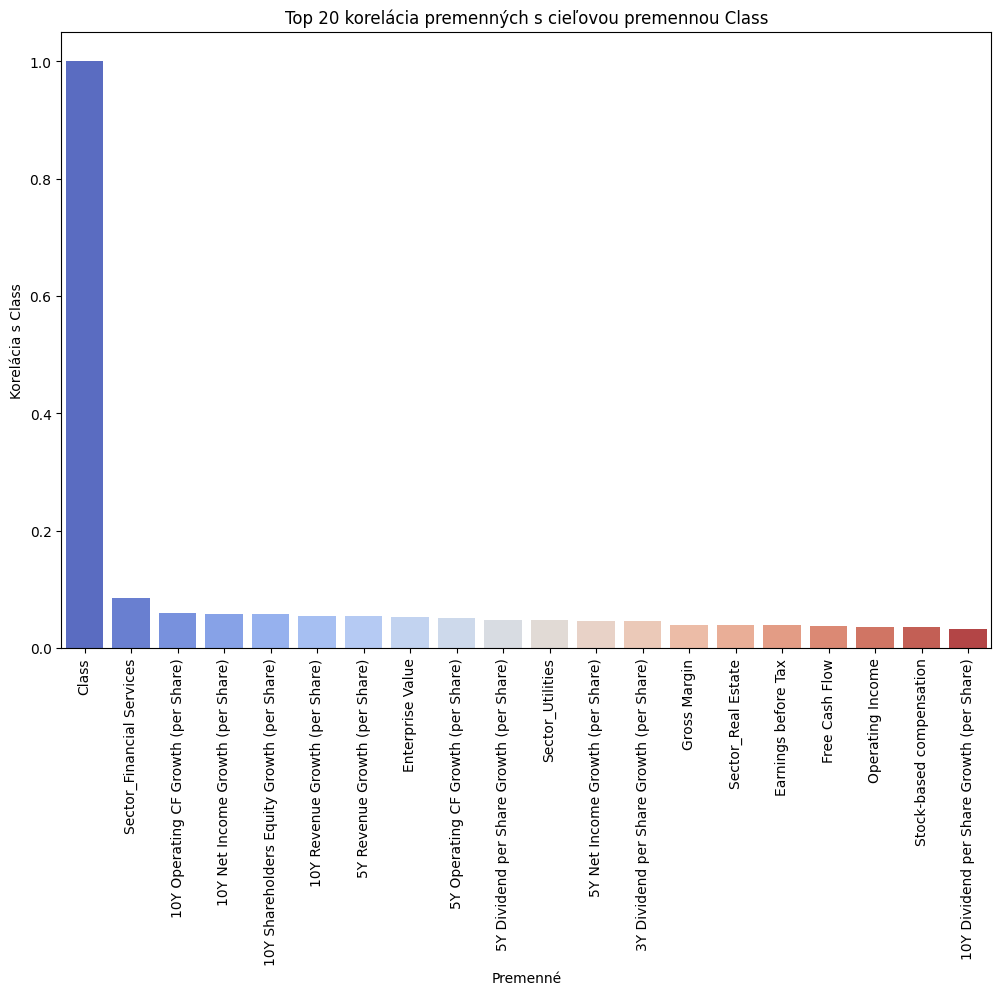

In [82]:
# vizualizácia korelácie cieľovej premennej 'Class'
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_corr.index, y=top_20_corr.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Premenné')
plt.ylabel('Korelácia s Class')
plt.title('Top 20 korelácia premenných s cieľovou premennou Class')
plt.show()

In [83]:
# oddelenie cieľovej premennej a funkcií
X = df_encoded.drop(columns=['Class'])
y = df_encoded['Class']

# rozdelenie dát na trénovaciu a testovaciu množinu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [84]:
from sklearn.preprocessing import MinMaxScaler

# Inicializácia škálovača
scaler = MinMaxScaler()

# Fit a transformácia trénovacích dát, transformácia testovacích dát
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
knn = KNeighborsClassifier()

In [87]:
# Trénovanie modelu na trénovacích dátach
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [88]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)

print(models)

 41%|████▏     | 12/29 [12:11<27:27, 96.93s/it]  